In [191]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max

# Загрузка изображения

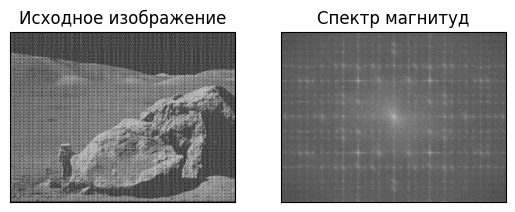

In [192]:
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
 
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Спектр магнитуд'), plt.xticks([]), plt.yticks([])
plt.show()

# Высокочастотная фильтрация на основе ядра Гаусса

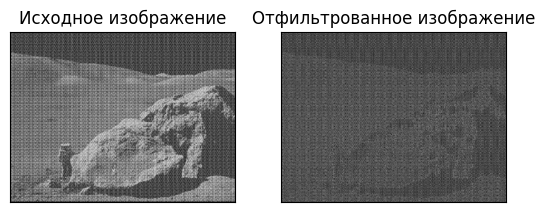

In [193]:
sigma = 30  
rows, cols = img.shape
x, y = np.meshgrid(np.arange(0, cols, 1), np.arange(0, rows, 1))
gauss_mask = np.exp(-((x - (cols // 2))**2 + (y - (rows // 2))**2) / (2 * sigma**2))
mask_res = 1 - gauss_mask

dft_shift = dft_shift * mask_res[:, :, np.newaxis]
img_idft = cv.idft(np.fft.ifftshift(dft_shift))
img_idft = cv.magnitude(img_idft[:,:,0], img_idft[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_idft, cmap = 'gray')
plt.title('Отфильтрованное изображение'), plt.xticks([]), plt.yticks([])
plt.show()

# Удаление периодического шума

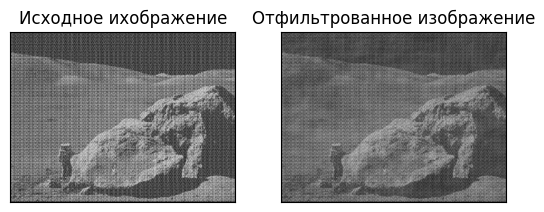

In [194]:
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
local_maxm = peak_local_max(magnitude_spectrum, min_distance=15, threshold_abs=200)
mask = np.copy(dft_shift)
mask[:, :, :] = 1
for i in local_maxm:
    r = np.int32(((i[0]-rows//2)**2+(i[1]-cols//2)**2)**(1/2))
    cv.circle(mask, (rows//2, cols//2), r, (0,0))

dft_shift = dft_shift * mask 
img_idft = cv.idft(np.fft.ifftshift(dft_shift))              
img_idft = cv.magnitude(img_idft[:,:,0], img_idft[:,:,1])               

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Исходное ихображение'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_idft, cmap = 'gray')
plt.title('Отфильтрованное изображение'), plt.xticks([]), plt.yticks([])
plt.show()